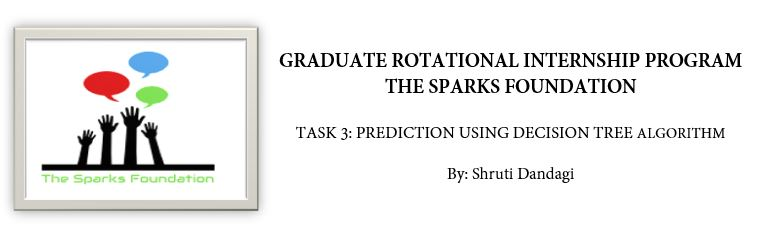

# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.  

## <font color=blue> Problem Statement

- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

##  1. Loading the necessary libraries


In [211]:
import warnings
warnings.filterwarnings("ignore")

In [212]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

## 2.  Reading the data and Inspection

In [213]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [214]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [215]:
#summary of all the numeric columns in the dataset
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [216]:
##Determining the number of rows and columns
data.shape

(150, 5)

In [217]:
#Datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- ###  2.1 Checking missing values

In [218]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

#### <font color=pink>We can see that there are no missing values in the dataset

In [219]:
feature = data.columns
for i in enumerate(feature):
    print(i)

(0, 'Petal length')
(1, 'Petal Width')
(2, 'Sepal Length')
(3, 'Sepal Width')
(4, 'Species')


In [220]:
data.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

#### <font color=pink>This data set has three varities of Iris plant

## 3. Data Visualization

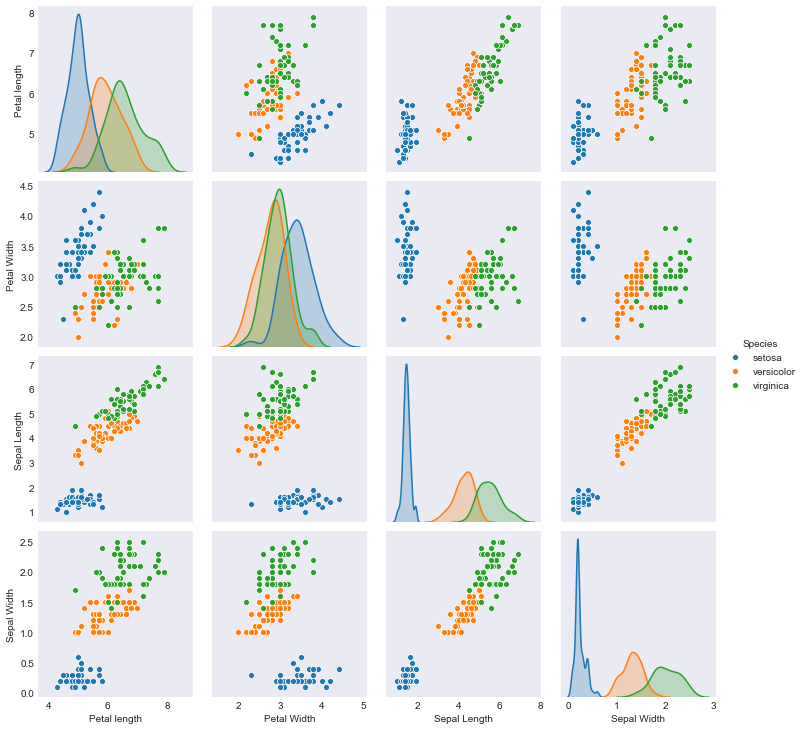

In [221]:
sns.pairplot(data, hue='Species')
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


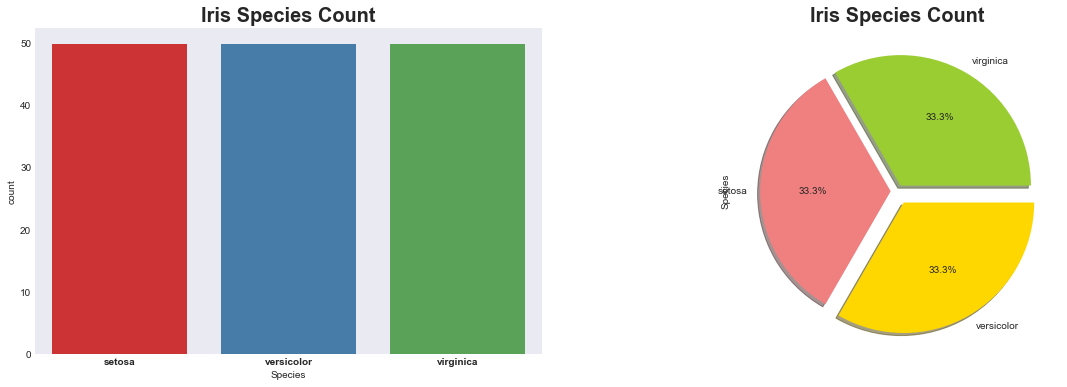

In [222]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot('Species',data=data, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.subplot(1,2,2)
data['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.show()

 Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset
- We can see that there are 50 samples each of all the Iris Species in the data set.

### Heatmap

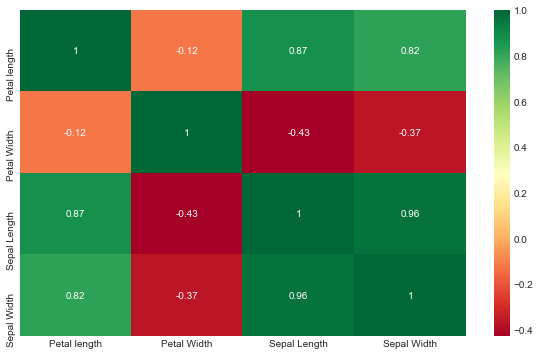

In [223]:
plt.figure(figsize=(10, 6))
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='RdYlGn',annot=True)
plt.show()

### Plotting Histogram to see the Distribution of data:

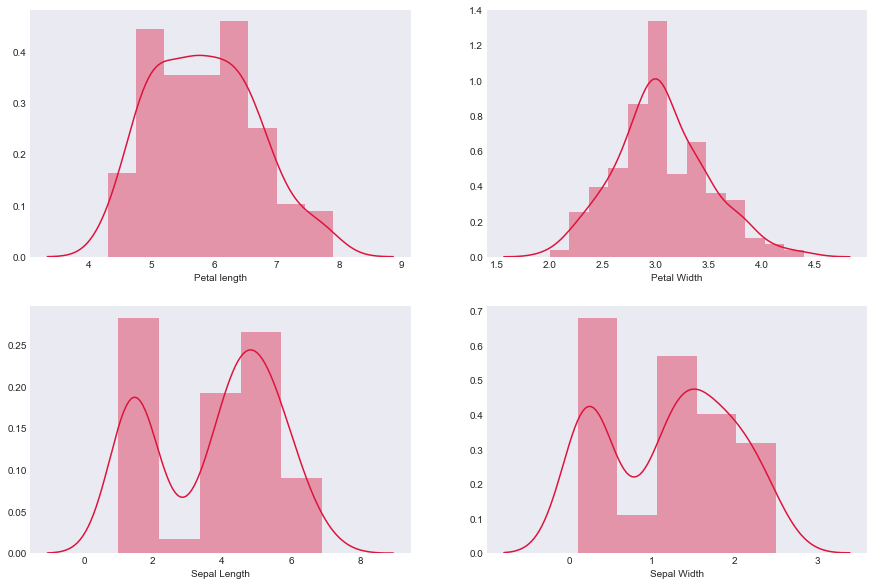

In [224]:
plt.figure(figsize = (15,10))
feature = data.columns[0:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(data[i[1]],color='crimson')

###  Checking for Outliers through Boxplots :

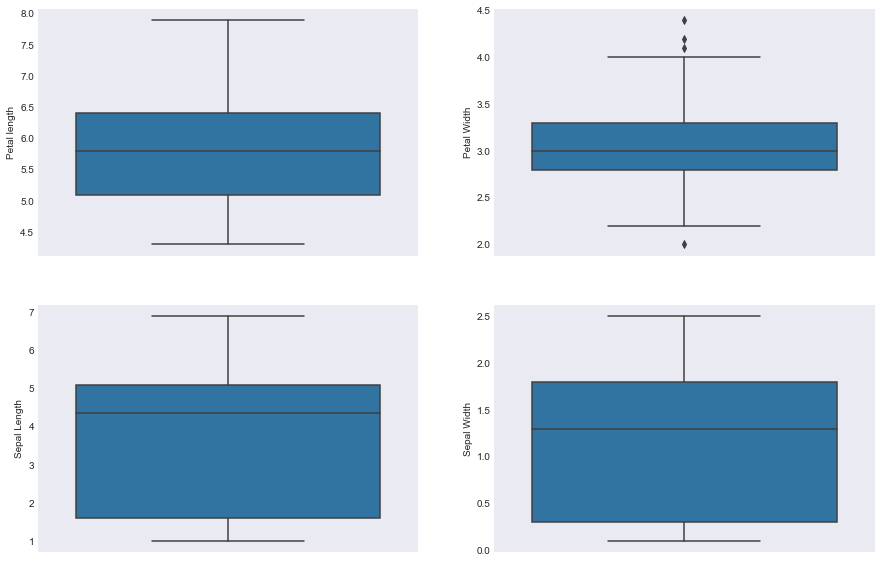

In [225]:
plt.figure(figsize = (15,10))
feature = data.columns[0:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(data[i[1]],orient='vert')

- The Data has the outliers lets treat them

### Outlier Treatment

In [226]:
q1 = data['Sepal Width'].quantile(0.01)
q4 = data['Sepal Width'].quantile(0.99)

data['Sepal Width'][data['Sepal Width']<= q1] = q1
data['Sepal Width'][data['Sepal Width']>= q4] = q4

In [227]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 4. Building the model

### <font color=yellow>Splitting the data into Training and Testing data:

In [228]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")



Training Complete.


### Making Predictions on the Testing Data:

In [229]:
y_pred = tree_classifier.predict(X_test)

### Comparing the actual and predicted flower classification

In [230]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df.head(20)

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


### Let us visualize the Decision Tree to understand it better.

In [231]:
Feature_names=list(data[['Sepal Length','Sepal Width','Petal length','Petal Width']])

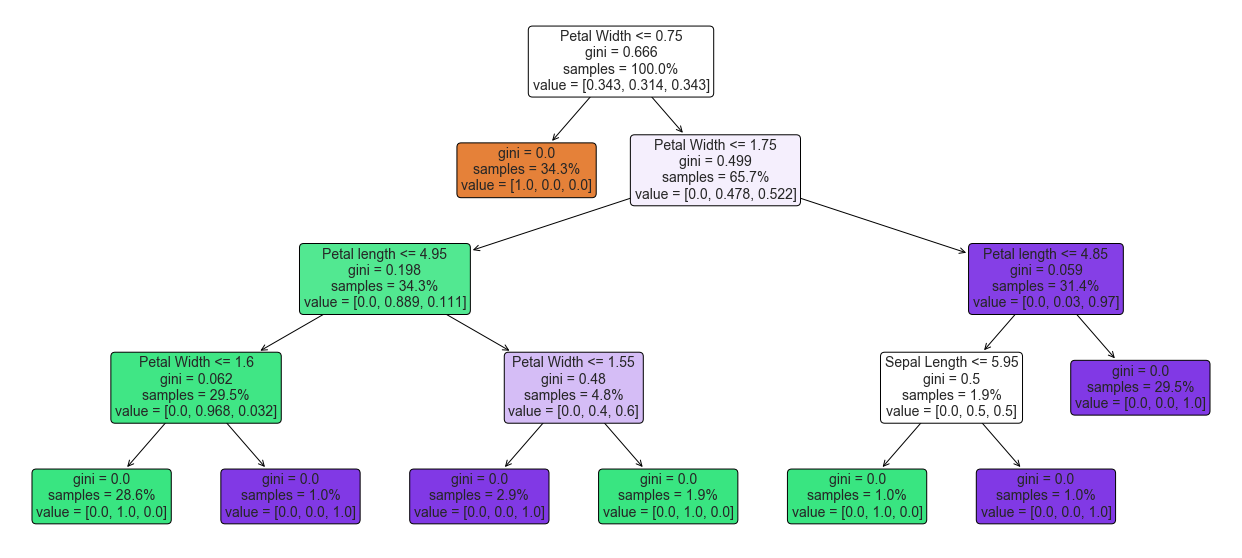

In [232]:
Tree=plt.figure(figsize=(22,10))
Tree=tree.plot_tree(dtree,feature_names=Feature_names,fontsize=14,filled='True',proportion=True,rounded=10)
plt.show()

## 5. Model Evaluation

In [233]:
print("Model Accuracy is : ",round(accuracy_score(y_pred,y_test)*100,2))

print(classification_report(y_pred,y_test))

Model Accuracy is :  97.78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



###  Accuracy =  97.78 %

# Conclusion:

We have got the accuracy of about 97.78%. So our model performed good by predicting the values accurately.